## Objets

### Créer son propre objet
Les objets sont très pratiques pour organiser le code. C'est une structure informatique qui rassemble:

* Des attributs, ex: `self.name` et `self.age` qui permettent de stocker des données.  
* Des méthodes, ex: `self.make_it_older(self)` qui permettent de faire des actions.

In [5]:
class Man:

    "cette fonction est lancée automatiquement quand on crée l'objet"
    def __init__(self,name,age):
        self.name=name
        self.age=age

    "les def ici sont des méthodes = des fonctions attachées à l'objet"
    def make_it_older(self):
        self.age+=1

    def change_name(self,new_name):
        self.name=new_name

    def print_me(self):
        print(self.name,", age:",self.age)


toto=Man("toto",7)
toto.change_name("tata")
toto.print_me()
toto.make_it_older()
toto.print_me()

L'instruction `toto.print_me()` peut aussi s'écrire  `Man.print_me(toto)`. C'est pour cela qu'il y a le mot `self` dans toutes les méthodes: ne l'oubliez pas.

***A vous:*** Observez $(1\heartsuit)$ le message d'erreur si on oublie le mot `self` dans la définition d'une méthode.


### Utiliser des objets existants
Même si on ne crée pas d'objet soi-même, on est obligé d'utiliser ceux des bibliothèques tierces. Par exemple la fameuse `numpy`

In [6]:
import numpy as np
"on crée un tableau numpy: c'est un objet"
tab=np.array([1,2,3,4])
"on en fait la somme avec une méthode associée à l'objet 'tab' qu'on vient d'initier "
tab.sum()

### Souplesse dangeureuse

En python on peut remplacer des fonctions existantes ou des attributs d'objet à n'importe quel moment. Rien n'est protégé. C'est pratique mais dangeureux. Observer cette mésaventure qui m'est vraiment arrivée.

Observons des tirages aélatoires de deux vecteurs: ils donnent des résultats différents.

In [7]:
print(np.random.randint(0,2,size=10))
print(np.random.randint(0,2,size=10))

Pour des raisons de reproductibilité, je voulais "geler" le hasard pour obtenir deux fois les deux mêmes vecteurs. J'ai donc fixé la graine (=seed) du générateur aléatoire comme ceci:

In [8]:
np.random.seed=42
print(np.random.randint(0,2,size=10))
np.random.seed=42
print(np.random.randint(0,2,size=10))

Mince cela ne fonctionne pas. Je regarde sur internet, et je vois que `np.random.seed` est une méthode et pas une variable. Du coup, il faut que je rajoute des parenthèses mais... cela va créer un bug!

In [9]:
"le 'try' permet de capturer les bugs"
try:
  np.random.seed(42)
  print(np.random.randint(0,2,size=10))
  np.random.seed(42)
  print(np.random.randint(0,2,size=10))
except Exception as e:
    "on affiche l'erreur"
    print("message d'erreur:\n"+ str(e))

In [10]:
#après une telle erreur, un reset s'impose.
%reset -f

***A vous:*** Expliquez $(2\heartsuit)$ ce qui s'est passé.

## Les erreurs


In [11]:
import numpy as np
import matplotlib.pyplot as plt

### Le jeux des messages d'erreurs


Il est très important de lire la toute fin des messages d'erreurs. C'est là qu'est donnée la cause du bug.

#### ♡♡♡♡♡

Reproduisez fidèlement les messages d'erreurs. Ils font partis des plus courants. Si un message d'erreur courant n'apparait pas dans cette liste, dites-le moi.

    name 'b' is not defined



    matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 5 is different from 7)



    operands could not be broadcast together with shapes (5,7) (5,6)



Aide: en dessous du message d'erreur, s'ouvre une fenêtre graphique.

    x and y must have same first dimension, but have shapes (10,) and (11,)



    module 'numpy' has no attribute 'rand'



    too many indices for array: array is 1-dimensional, but 2 were indexed



    index 4 is out of bounds for axis 0 with size 3



    only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices



In [20]:
class Toto:
    def __init__(self):
        pass


    'Toto' object has no attribute 'a'



In [21]:
class Toto:
    def __init__(self):
        pass
    def bou(self):
        pass


    Toto.bou() takes 1 positional argument but 2 were given



In [22]:
class Toto:
    def __init__(self):
        pass
    def bou():
        pass


    Toto.bou() takes 0 positional arguments but 1 was given



    division by zero



In [24]:
a=np.zeros([3])


    <ipython-input-27-a7a5080b545b>:5: RuntimeWarning: invalid value encountered in divide a/b

In [25]:
class Toto:
    def __init__(self):
        pass


    'Toto' object is not subscriptable

In [26]:
class Toto:
    def __init__(self):
        pass


    'Toto' object is not callable

    maximum recursion depth exceeded

    <lambda>() missing 1 required positional argument: 'a'

### Le chemin qui mène à l'erreur

Le début du message d'erreur décris la "pile d'appels", c'est-à-dire l'emboitement des fonctions qui mène au bug.

Pour mieux comprendre, excécutez le code ci-dessous, puis examinez le message d'erreur.

    def toto():
        print(aaaa)

    def callToto():
        toto()

    callToto()

    

## simple-coding-style

Voici ma technique pour construire les objets:

* Ne faire un objet que lorsqu'on doit stocker des valeurs. Sinon, une fonction fait mieux l'affaire.

* Initialiser tous les attributs publiques via le constructeurs

* Toutes les méthodes non privées doivent avoir des arguments très clairs, un nom très explicite, et doivent retourner quelque chose d'utile.   

* Ne pas modifier un attribut publique à l'interieure d'une méthode

Pour les attributs privés et les méthodes privées, vous faites ce que vous voulez (mais restez simple).


Ajoutons à cela que vous avez vraiment une très belle Classe, quand l'utilisateur comprend ce qu'elle fait en observant simplement son utilisation.

De plus, essayer de ne pas faire des classes 'trop grosses' qui font plein de choses différentes.

 Il y a plein de manière de séparer sont programme en plusieurs bouts. Par exemple un antique design patern de programmation s'appel Model-View-Controler:
* Model: gestion des données
* View: visualisation
* Controler: calcul

Biensur, il peut être pratique de mutualiser dans une même classe la gestion des données et le calcul. Ou bien d'avoir une petite méthode `plot` permettant de visualiser rapidement des données d'un conteneur.



Dernier conseil: utiliser au maximum les choses 'générique':

* Par exemple c'est mieux d'utiliser une fonction toute faite qu'une fonction qu'on fait soit même
* Par exemple c'est mieux de faire une fonction qui prennent en entrée un tenseur `numpy` plutôt qu'une fonction qui prenne en entrée une classe spécifique dont l'un des attributs est le tenseur numpy sur lequel on va baser les calculs.


##  Défi prog: Objet vs fonction-maker

On pense à créer un objet à chaque fois qu'il y a des données à stocker. Mas il y a une alternative: le fonction maker

In [29]:
def linear_fnm(slope):
    def linear_fn(x):
        return slope*x
    return linear_fn

linear_fn=linear_fnm(5)
linear_fn(10)

Qui est l'équivalent de:

In [30]:
class LinearFn:
    def __init__(self,slope):
        self.slope=slope
    def __call__(self,x):
        return self.slope*x


linear_fn=LinearFn(5)
linear_fn(10)

#### ♡♡♡

***A vous:*** Analyser le programme suivants. Quelle est la chose que l'on veut 'stocker' (pour être éventuellement réutiliser plusieur fois).





In [31]:
import scipy

class SmootherByConv:

    def __init__(self,
            kernel_len:int,
            method="auto",
            kernel_type="triangle"
    ):
        assert kernel_len%2==1,"kernel_len must be odd"
        assert kernel_type in ["triangle", "rectangle"]
        self.method=method
        self.kernel_half_len=kernel_len//2


        if kernel_type == "triangle":
            half_kernel = np.arange(1, self.kernel_half_len+1, dtype=float)
            middle_values=np.ones([1])*half_kernel[-1]
            kernel = np.concatenate([half_kernel, middle_values, half_kernel[::-1]])
        else:  # rectangle
            kernel = np.ones([kernel_len])


        self.kernel = kernel/np.sum(kernel)



    def __call__(self,signal):

        assert len(signal)>2*self.kernel_half_len, f"the signal with len:{len(signal)} si too short to be smoothed with a kernel_len={2*self.kernel_half_len+1}"
        signal_conv=scipy.signal.convolve(signal,self.kernel,mode="valid",method=self.method)

        return signal_conv


In [32]:
def test_SmoothByConv():

    kernel_lens=[5,7]
    method = "fft"
    kernel_types = ["triangle","rectangle"]
    suptitle="test_SmoothByConv"


    fig, axs = plt.subplots(len(kernel_lens), len(kernel_types))

    size = 3*5
    signal = np.arange(0, size)
    signal = np.concatenate([signal, signal[::-1]])
    times=np.arange(len(signal),dtype=signal.dtype)

    for i,kernel_len in enumerate(kernel_lens):
        for j, kernel_type in enumerate(kernel_types):

            smoother=SmootherByConv(kernel_len,method,kernel_type)

            signal_smooth=smoother(signal)

            axs[i,j].plot(times, signal, ".-")

            half_kernel_len=kernel_len//2
            axs[i,j].plot(times[half_kernel_len:-half_kernel_len], signal_smooth, ".-")


test_SmoothByConv()

Et voici une variante "function maker".

Complétez-là.

In [33]:
import scipy

def smootheByConv_fnm(
        kernel_len:int,
        method="auto",
        kernel_type="triangle"):


    assert kernel_len%2==1,"kernel_len must be odd"
    assert kernel_type in ["triangle", "rectangle"]

    kernel_half_len=kernel_len//2

    if kernel_type == "triangle":
        half_kernel = np.arange(1, kernel_half_len+1, dtype=float)
        middle_values=np.ones([1])*half_kernel[-1]
        kernel = np.concatenate([half_kernel, middle_values, half_kernel[::-1]])
    else:  # rectangle
        kernel = np.ones([kernel_len])

    kernel = kernel/np.sum(kernel)


    def smootheByConv_fn(signal):
        ...
        return signal_conv


    return smootheByConv_fn


Faites le programme test (il n'y a quasi rien à changer par rapport au précédent).

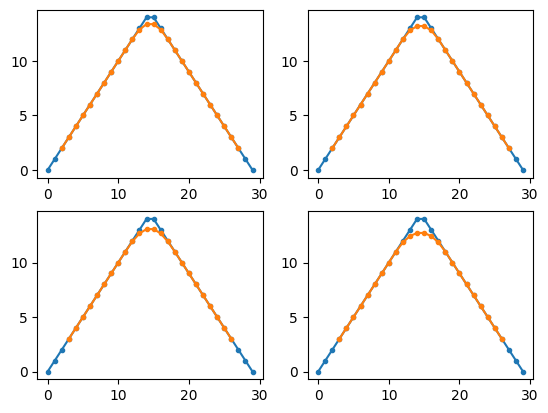

In [34]:
#--- To keep following outputs, do not run this cell! ---

#### ♡♡♡♡


* Si l'utilisateur entre `kernel_len=1` nos smoother  plantent. Pourquoi ? Faite en sorte que cela fonctionne aussi avec `kernel_len=1` (que devrait renvoyer notre smoother dans ce cas là ?)


* Ajoutez `kernel_type="gaussian"`
